In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import shap
from dask_ml.model_selection import train_test_split as dask_train_test_split
from dask.distributed import Client
import dask.dataframe as dd

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import random
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multitest import multipletests
import seaborn as sns

In [408]:
hp_tr_4_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_tr_4.csv")
hp_tr_24_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_tr_24.csv")
hp_tr_48_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_tr_48.csv")
hp_tr_72_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_tr_72.csv")

hp_mo_4_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_mo_4.csv")
hp_mo_24_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_mo_24.csv")
hp_mo_48_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_mo_48.csv")
hp_mo_72_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_hp_mo_72.csv")

lp_tr_4_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_tr_4.csv")
lp_tr_24_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_tr_24.csv")
lp_tr_48_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_tr_48.csv")
lp_tr_72_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_tr_72.csv")

lp_mo_4_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_mo_4.csv")
lp_mo_24_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_mo_24.csv")
lp_mo_48_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_mo_48.csv")
lp_mo_72_ori = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_mo_72.csv")


In [409]:
sol_hp_tr_4 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_tr_4.csv")
sol_hp_tr_24 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_tr_24.csv")
sol_hp_tr_48 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_tr_48.csv")
sol_hp_tr_72 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_tr_72.csv")

sol_hp_mo_4 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_mo_4.csv")
sol_hp_mo_24 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_mo_24.csv")
sol_hp_mo_48 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_mo_48.csv")
sol_hp_mo_72 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_hp_mo_72.csv")

sol_lp_tr_4 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_tr_4.csv")
sol_lp_tr_24 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_tr_24.csv")
sol_lp_tr_48 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_tr_48.csv")
sol_lp_tr_72 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_tr_72.csv")

sol_lp_mo_4 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_mo_4.csv")
sol_lp_mo_24 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_mo_24.csv")
sol_lp_mo_48 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_mo_48.csv")
sol_lp_mo_72 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/solver_status_lp_mo_72.csv")


In [410]:
df1 = pd.concat([hp_tr_4_ori, sol_hp_tr_4], axis=1)
df2 = pd.concat([hp_tr_24_ori, sol_hp_tr_24], axis=1)
df3 = pd.concat([hp_tr_48_ori, sol_hp_tr_48], axis=1)
df4 = pd.concat([hp_tr_72_ori, sol_hp_tr_72], axis=1)

df5 = pd.concat([hp_mo_4_ori, sol_hp_mo_4], axis=1)
df6 = pd.concat([hp_mo_24_ori, sol_hp_mo_24], axis=1)
df7 = pd.concat([hp_mo_48_ori, sol_hp_mo_48], axis=1)
df8 = pd.concat([hp_mo_72_ori, sol_hp_mo_72], axis=1)

df9 = pd.concat([lp_tr_4_ori, sol_lp_tr_4], axis=1)
df10 = pd.concat([lp_tr_24_ori, sol_lp_tr_24], axis=1)
df11 = pd.concat([lp_tr_48_ori, sol_lp_tr_48], axis=1)
df12 = pd.concat([lp_tr_72_ori, sol_lp_tr_72], axis=1)

df13 = pd.concat([lp_mo_4_ori, sol_lp_mo_4], axis=1)
df14 = pd.concat([lp_mo_24_ori, sol_lp_mo_24], axis=1)
df15 = pd.concat([lp_mo_48_ori, sol_lp_mo_48], axis=1)
df16 = pd.concat([lp_mo_72_ori, sol_lp_mo_72], axis=1)

In [411]:
hp_tr_4 = df1[~df1['0'].str.contains('infeasible', case=False, na=False)]
hp_tr_24 = df2[~df2['0'].str.contains('infeasible', case=False, na=False)]
hp_tr_48 = df3[~df3['0'].str.contains('infeasible', case=False, na=False)]
hp_tr_72 = df4[~df4['0'].str.contains('infeasible', case=False, na=False)]

hp_mo_4 = df5[~df5['0'].str.contains('infeasible', case=False, na=False)]
hp_mo_24 = df6[~df6['0'].str.contains('infeasible', case=False, na=False)]
hp_mo_48 = df7[~df7['0'].str.contains('infeasible', case=False, na=False)]
hp_mo_72 = df8[~df8['0'].str.contains('infeasible', case=False, na=False)]

lp_tr_4 = df9[~df9['0'].str.contains('infeasible', case=False, na=False)]
lp_tr_24 = df10[~df10['0'].str.contains('infeasible', case=False, na=False)]
lp_tr_48 = df11[~df11['0'].str.contains('infeasible', case=False, na=False)]
lp_tr_72 = df12[~df12['0'].str.contains('infeasible', case=False, na=False)]

lp_mo_4 = df13[~df13['0'].str.contains('infeasible', case=False, na=False)]
lp_mo_24 = df14[~df14['0'].str.contains('infeasible', case=False, na=False)]
#lp_mo_24 = pd.read_csv("/home/users/lzehetner/data/paper4_aav/HEK_AAV/flux_sampling/old_correct_data/loopless_flux_samples_lp_mo_24.csv")
lp_mo_48 = df15[~df15['0'].str.contains('infeasible', case=False, na=False)]
lp_mo_72 = df16[~df16['0'].str.contains('infeasible', case=False, na=False)]

In [412]:
hp_tr_4 = hp_tr_4.iloc[:, :-1]
hp_tr_24 = hp_tr_24.iloc[:, :-1]
hp_tr_48 = hp_tr_48.iloc[:, :-1]
hp_tr_72 = hp_tr_72.iloc[:, :-1]

hp_mo_4 = hp_mo_4.iloc[:, :-1]
hp_mo_24 = hp_mo_24.iloc[:, :-1]
hp_mo_48 = hp_mo_48.iloc[:, :-1]
hp_mo_72 = hp_mo_72.iloc[:, :-1]

lp_tr_4 = lp_tr_4.iloc[:, :-1]
lp_tr_24 = lp_tr_24.iloc[:, :-1]
lp_tr_48 = lp_tr_48.iloc[:, :-1]
lp_tr_72 = lp_tr_72.iloc[:, :-1]

lp_mo_4 = lp_mo_4.iloc[:, :-1]
lp_mo_24 = lp_mo_24.iloc[:, :-1]
lp_mo_48 = lp_mo_48.iloc[:, :-1]
lp_mo_72 = lp_mo_72.iloc[:, :-1]

In [298]:
dataframes = {
    'HP_TR_4': hp_tr_4, 
    'HP_MO_4': hp_mo_4, 
    'LP_TR_4': lp_tr_4, 
    'LP_MO_4': lp_mo_4
}

# Add the 'model' column and merge all dataframes
merged_df = pd.concat(
    [df.assign(model=name) for name, df in dataframes.items()],
    ignore_index=True
)

# Replace NaN values with 0
merged_df = merged_df.fillna(0)

# Final merged dataframe
df_4_merged = merged_df

In [299]:
dataframes = {
    'HP_TR_24': hp_tr_24, 
    'HP_MO_24': hp_mo_24, 
    'LP_TR_24': lp_tr_24, 
    'LP_MO_24': lp_mo_24
}

# Add the 'model' column and merge all dataframes
merged_df = pd.concat(
    [df.assign(model=name) for name, df in dataframes.items()],
    ignore_index=True
)

# Replace NaN values with 0
merged_df = merged_df.fillna(0)

# Final merged dataframe
df_24_merged = merged_df

In [300]:
dataframes = {
    'HP_TR_48': hp_tr_48, 
    'HP_MO_48': hp_mo_48, 
    'LP_TR_48': lp_tr_48, 
    'LP_MO_48': lp_mo_48
}

# Add the 'model' column and merge all dataframes
merged_df = pd.concat(
    [df.assign(model=name) for name, df in dataframes.items()],
    ignore_index=True
)

# Replace NaN values with 0
merged_df = merged_df.fillna(0)

# Final merged dataframe
df_48_merged = merged_df

In [301]:
dataframes = {
    'HP_TR_72': hp_tr_72, 
    'HP_MO_72': hp_mo_72, 
    'LP_TR_72': lp_tr_72, 
    'LP_MO_72': lp_mo_72
}

# Add the 'model' column and merge all dataframes
merged_df = pd.concat(
    [df.assign(model=name) for name, df in dataframes.items()],
    ignore_index=True
)

# Replace NaN values with 0
merged_df = merged_df.fillna(0)

# Final merged dataframe
df_72_merged = merged_df

In [302]:
# Start Dask client
client = Client()

/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43517 instead
  warnings.warn(


In [303]:
######################################################
#---------------------- TP 04 -----------------------#
######################################################

# 1. Load or simulate data
X = df_4_merged.drop(columns=['model']).to_numpy()  # Convert features DataFrame to NumPy array
y = df_4_merged['model'].to_numpy()  # Convert target column to NumPy array

# Convert to Dask DataFrame for scalability
X_dask = dd.from_array(X)
y_dask = dd.from_array(y)

# Split into train-test sets using Dask
X_train_dask, X_test_dask, y_train_dask, y_test_dask = dask_train_test_split(
    X_dask, y_dask, test_size=0.2, random_state=42, shuffle=True)

# Convert back to NumPy arrays for sklearn compatibility
X_train = X_train_dask.compute()
X_test = X_test_dask.compute()
y_train = y_train_dask.compute()
y_test = y_test_dask.compute()

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Hyperparameter optimization with RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

clf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50,
                                    cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc_ovr')
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# 3. Train model with Stratified K-Fold cross-validation
best_model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Reset index of y_train to avoid index misalignment
y_train = pd.Series(y_train).reset_index(drop=True)

roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    # Split using indices
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train model
    best_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')  # Use the best params from earlier if available
    best_model.fit(X_cv_train, y_cv_train)
    
    # Predict probabilities for ROC-AUC
    y_cv_pred = best_model.predict_proba(X_cv_val)
    roc_auc = roc_auc_score(y_cv_val, y_cv_pred, multi_class='ovr')
    roc_auc_scores.append(roc_auc)

print("Average CV ROC-AUC:", np.mean(roc_auc_scores))

# Train on full training set and evaluate on test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("Test ROC-AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_classification_report_4.csv", index=True)

# 5. SHAP Analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)  # Subset for memory efficiency
#shap.summary_plot(shap_values, X_test[:100], feature_names=[f"Feature {i}" for i in range(X_test.shape[1])])

hp_tr_4_shap_values = shap_values[:, :, 0]  # SHAP values for Condition A
hp_mo_4_shap_values = shap_values[:, :, 1]  # SHAP values for Condition B
lp_tr_4_shap_values = shap_values[:, :, 2]  # SHAP values for Condition C
lp_mo_4_shap_values = shap_values[:, :, 3]  # SHAP values for Condition D
#test_shap_values = shap_values[:, :, 4]  # SHAP values for Condition D

feature_names = [col for col in df_4_merged.columns if col != "model"]

# Create DataFrames
condition_A_df = pd.DataFrame(hp_tr_4_shap_values, columns=feature_names)
condition_B_df = pd.DataFrame(hp_mo_4_shap_values, columns=feature_names)
condition_C_df = pd.DataFrame(lp_tr_4_shap_values, columns=feature_names)
condition_D_df = pd.DataFrame(lp_mo_4_shap_values, columns=feature_names)

# Compute mean SHAP values for each feature across all samples
mean_condition_A = condition_A_df.mean()
mean_condition_B = condition_B_df.mean()
mean_condition_C = condition_C_df.mean()
mean_condition_D = condition_D_df.mean()

# Combine into a summary DataFrame
summary_df_4 = pd.DataFrame({
    'HP_TR_4': mean_condition_A,
    'HP_MO_4': mean_condition_B,
    'LP_TR_4': mean_condition_C,
    'LP_MO_4': mean_condition_D
})

summary_df_4.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_class_shap_values_4.csv', index=True)

valid_features = []
for feature in condition_A_df.columns:
    if (
        condition_A_df[feature].std() > 0 or
        condition_B_df[feature].std() > 0 or
        condition_C_df[feature].std() > 0 or
        condition_D_df[feature].std() > 0
    ):
        valid_features.append(feature)

# Keep only valid features in SHAP data
condition_A_df = condition_A_df[valid_features]
condition_B_df = condition_B_df[valid_features]
condition_C_df = condition_C_df[valid_features]
condition_D_df = condition_D_df[valid_features]

# Example: Perform ANOVA without taking the mean
p_values = []
for feature in condition_A_df.columns:
    # Use all SHAP values for this feature across conditions
    _, p_value = kruskal(
        condition_A_df[feature],
        condition_B_df[feature],
        condition_C_df[feature],
        condition_D_df[feature]
    )
    p_values.append(p_value)

# Adjust p-values for multiple testing
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Add p-values to a summary DataFrame
shap_stat_results = pd.DataFrame({
    'Feature': condition_A_df.columns,
    'p_value': p_values,
    'adjusted_p_value': adjusted_p_values,
})
shap_stat_results['is_enriched'] = shap_stat_results['adjusted_p_value'] < 0.05

# View significant features
significant_features_4 = shap_stat_results[shap_stat_results['is_enriched']]

significant_features_4.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_sign_shap_values_4.csv', index=True)

/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 197.47 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 197.47 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimato

In [304]:
######################################################
#---------------------- TP 24 -----------------------#
######################################################

# 1. Load or simulate data
X = df_24_merged.drop(columns=['model']).to_numpy()  # Convert features DataFrame to NumPy array
y = df_24_merged['model'].to_numpy()  # Convert target column to NumPy array

# Convert to Dask DataFrame for scalability
X_dask = dd.from_array(X)
y_dask = dd.from_array(y)

# Split into train-test sets using Dask
X_train_dask, X_test_dask, y_train_dask, y_test_dask = dask_train_test_split(
    X_dask, y_dask, test_size=0.2, random_state=42, shuffle=True)

# Convert back to NumPy arrays for sklearn compatibility
X_train = X_train_dask.compute()
X_test = X_test_dask.compute()
y_train = y_train_dask.compute()
y_test = y_test_dask.compute()

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Hyperparameter optimization with RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

clf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50,
                                    cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc_ovr')
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# 3. Train model with Stratified K-Fold cross-validation
best_model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Reset index of y_train to avoid index misalignment
y_train = pd.Series(y_train).reset_index(drop=True)

roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    # Split using indices
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train model
    best_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')  # Use the best params from earlier if available
    best_model.fit(X_cv_train, y_cv_train)
    
    # Predict probabilities for ROC-AUC
    y_cv_pred = best_model.predict_proba(X_cv_val)
    roc_auc = roc_auc_score(y_cv_val, y_cv_pred, multi_class='ovr')
    roc_auc_scores.append(roc_auc)

print("Average CV ROC-AUC:", np.mean(roc_auc_scores))

# Train on full training set and evaluate on test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("Test ROC-AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_classification_report_24.csv", index=True)

# 5. SHAP Analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)  # Subset for memory efficiency
#shap.summary_plot(shap_values, X_test[:100], feature_names=[f"Feature {i}" for i in range(X_test.shape[1])])

hp_tr_24_shap_values = shap_values[:, :, 0]  # SHAP values for Condition A
hp_mo_24_shap_values = shap_values[:, :, 1]  # SHAP values for Condition B
lp_tr_24_shap_values = shap_values[:, :, 2]  # SHAP values for Condition C
#lp_mo_24_shap_values = shap_values[:, :, 3]  # SHAP values for Condition D
#test_shap_values = shap_values[:, :, 4]  # SHAP values for Condition D

feature_names = [col for col in df_24_merged.columns if col != "model"]

# Create DataFrames
condition_A_df = pd.DataFrame(hp_tr_24_shap_values, columns=feature_names)
condition_B_df = pd.DataFrame(hp_mo_24_shap_values, columns=feature_names)
condition_C_df = pd.DataFrame(lp_tr_24_shap_values, columns=feature_names)
#condition_D_df = pd.DataFrame(lp_mo_24_shap_values, columns=feature_names)

# Compute mean SHAP values for each feature across all samples
mean_condition_A = condition_A_df.mean()
mean_condition_B = condition_B_df.mean()
mean_condition_C = condition_C_df.mean()
#mean_condition_D = condition_D_df.mean()

# Combine into a summary DataFrame
summary_df_24 = pd.DataFrame({
    'HP_TR_24': mean_condition_A,
    'HP_MO_24': mean_condition_B,
    'LP_TR_24': mean_condition_C#,
#    'LP_MO_24': mean_condition_D
})

summary_df_24.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_class_shap_values_24.csv', index=True)

valid_features = []
for feature in condition_A_df.columns:
    if (
        condition_A_df[feature].std() > 0 or
        condition_B_df[feature].std() > 0 or
        condition_C_df[feature].std() > 0 #or
#        condition_D_df[feature].std() > 0
    ):
        valid_features.append(feature)

# Keep only valid features in SHAP data
condition_A_df = condition_A_df[valid_features]
condition_B_df = condition_B_df[valid_features]
condition_C_df = condition_C_df[valid_features]
#condition_D_df = condition_D_df[valid_features]

# Example: Perform ANOVA without taking the mean
p_values = []
for feature in condition_A_df.columns:
    # Use all SHAP values for this feature across conditions
    _, p_value = kruskal(
        condition_A_df[feature],
        condition_B_df[feature],
        condition_C_df[feature]#,
#        condition_D_df[feature]
    )
    p_values.append(p_value)

# Adjust p-values for multiple testing
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Add p-values to a summary DataFrame
shap_stat_results = pd.DataFrame({
    'Feature': condition_A_df.columns,
    'p_value': p_values,
    'adjusted_p_value': adjusted_p_values,
})
shap_stat_results['is_enriched'] = shap_stat_results['adjusted_p_value'] < 0.05

# View significant features
significant_features_24 = shap_stat_results[shap_stat_results['is_enriched']]

significant_features_24.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_sign_shap_values_24.csv', index=True)

/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 100.75 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 4.3min
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 4.3min
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 4.3min


/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 100.75 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time= 4.3min
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Average CV ROC-AUC: 1.0
Test ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

    HP_MO_24       1.00      1.00      1.00        90
    HP_TR_24       1.00      1.00      1.00       150
    LP_TR_24       1.00      1.00      1.00        42

    accuracy                           1.00       282
   macro avg       1.00      1.00      1.00       282
weighted avg       1.00      1.00      1.00       282



In [305]:
######################################################
#---------------------- TP 48 -----------------------#
######################################################

# 1. Load or simulate data
X = df_48_merged.drop(columns=['model']).to_numpy()  # Convert features DataFrame to NumPy array
y = df_48_merged['model'].to_numpy()  # Convert target column to NumPy array

# Convert to Dask DataFrame for scalability
X_dask = dd.from_array(X)
y_dask = dd.from_array(y)

# Split into train-test sets using Dask
X_train_dask, X_test_dask, y_train_dask, y_test_dask = dask_train_test_split(
    X_dask, y_dask, test_size=0.2, random_state=42, shuffle=True)

# Convert back to NumPy arrays for sklearn compatibility
X_train = X_train_dask.compute()
X_test = X_test_dask.compute()
y_train = y_train_dask.compute()
y_test = y_test_dask.compute()

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Hyperparameter optimization with RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

clf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50,
                                    cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc_ovr')
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# 3. Train model with Stratified K-Fold cross-validation
best_model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Reset index of y_train to avoid index misalignment
y_train = pd.Series(y_train).reset_index(drop=True)

roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    # Split using indices
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train model
    best_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')  # Use the best params from earlier if available
    best_model.fit(X_cv_train, y_cv_train)
    
    # Predict probabilities for ROC-AUC
    y_cv_pred = best_model.predict_proba(X_cv_val)
    roc_auc = roc_auc_score(y_cv_val, y_cv_pred, multi_class='ovr')
    roc_auc_scores.append(roc_auc)

print("Average CV ROC-AUC:", np.mean(roc_auc_scores))

# Train on full training set and evaluate on test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("Test ROC-AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_classification_report_48.csv", index=True)

# 5. SHAP Analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)  # Subset for memory efficiency
#shap.summary_plot(shap_values, X_test[:100], feature_names=[f"Feature {i}" for i in range(X_test.shape[1])])

hp_tr_48_shap_values = shap_values[:, :, 0]  # SHAP values for Condition A
hp_mo_48_shap_values = shap_values[:, :, 1]  # SHAP values for Condition B
lp_tr_48_shap_values = shap_values[:, :, 2]  # SHAP values for Condition C
lp_mo_48_shap_values = shap_values[:, :, 3]  # SHAP values for Condition D
#test_shap_values = shap_values[:, :, 4]  # SHAP values for Condition D

feature_names = [col for col in df_48_merged.columns if col != "model"]

# Create DataFrames
condition_A_df = pd.DataFrame(hp_tr_48_shap_values, columns=feature_names)
condition_B_df = pd.DataFrame(hp_mo_48_shap_values, columns=feature_names)
condition_C_df = pd.DataFrame(lp_tr_48_shap_values, columns=feature_names)
condition_D_df = pd.DataFrame(lp_mo_48_shap_values, columns=feature_names)

# Compute mean SHAP values for each feature across all samples
mean_condition_A = condition_A_df.mean()
mean_condition_B = condition_B_df.mean()
mean_condition_C = condition_C_df.mean()
mean_condition_D = condition_D_df.mean()

# Combine into a summary DataFrame
summary_df_48 = pd.DataFrame({
    'HP_TR_48': mean_condition_A,
    'HP_MO_48': mean_condition_B,
    'LP_TR_48': mean_condition_C,
    'LP_MO_48': mean_condition_D
})

summary_df_48.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_class_shap_values_48.csv', index=True)

valid_features = []
for feature in condition_A_df.columns:
    if (
        condition_A_df[feature].std() > 0 or
        condition_B_df[feature].std() > 0 or
        condition_C_df[feature].std() > 0 or
        condition_D_df[feature].std() > 0
    ):
        valid_features.append(feature)

# Keep only valid features in SHAP data
condition_A_df = condition_A_df[valid_features]
condition_B_df = condition_B_df[valid_features]
condition_C_df = condition_C_df[valid_features]
condition_D_df = condition_D_df[valid_features]

# Example: Perform ANOVA without taking the mean
p_values = []
for feature in condition_A_df.columns:
    # Use all SHAP values for this feature across conditions
    _, p_value = kruskal(
        condition_A_df[feature],
        condition_B_df[feature],
        condition_C_df[feature],
        condition_D_df[feature]
    )
    p_values.append(p_value)

# Adjust p-values for multiple testing
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Add p-values to a summary DataFrame
shap_stat_results = pd.DataFrame({
    'Feature': condition_A_df.columns,
    'p_value': p_values,
    'adjusted_p_value': adjusted_p_values,
})
shap_stat_results['is_enriched'] = shap_stat_results['adjusted_p_value'] < 0.05

# View significant features
significant_features_48 = shap_stat_results[shap_stat_results['is_enriched']]

significant_features_48.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_sign_shap_values_48.csv', index=True)

/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 208.71 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 208.71 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time= 8.6min
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   1.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=

In [306]:
######################################################
#---------------------- TP 72 -----------------------#
######################################################

# 1. Load or simulate data
X = df_72_merged.drop(columns=['model']).to_numpy()  # Convert features DataFrame to NumPy array
y = df_72_merged['model'].to_numpy()  # Convert target column to NumPy array

# Convert to Dask DataFrame for scalability
X_dask = dd.from_array(X)
y_dask = dd.from_array(y)

# Split into train-test sets using Dask
X_train_dask, X_test_dask, y_train_dask, y_test_dask = dask_train_test_split(
    X_dask, y_dask, test_size=0.2, random_state=42, shuffle=True)

# Convert back to NumPy arrays for sklearn compatibility
X_train = X_train_dask.compute()
X_test = X_test_dask.compute()
y_train = y_train_dask.compute()
y_test = y_test_dask.compute()

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Hyperparameter optimization with RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

clf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle class imbalance
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50,
                                    cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc_ovr')
random_search.fit(X_train, y_train)

# Best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# 3. Train model with Stratified K-Fold cross-validation
best_model = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Reset index of y_train to avoid index misalignment
y_train = pd.Series(y_train).reset_index(drop=True)

roc_auc_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    # Split using indices
    X_cv_train, X_cv_val = X_train[train_index], X_train[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train model
    best_model = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')  # Use the best params from earlier if available
    best_model.fit(X_cv_train, y_cv_train)
    
    # Predict probabilities for ROC-AUC
    y_cv_pred = best_model.predict_proba(X_cv_val)
    roc_auc = roc_auc_score(y_cv_val, y_cv_pred, multi_class='ovr')
    roc_auc_scores.append(roc_auc)

print("Average CV ROC-AUC:", np.mean(roc_auc_scores))

# Train on full training set and evaluate on test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("Test ROC-AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_classification_report_72.csv", index=True)

# 5. SHAP Analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)  # Subset for memory efficiency
#shap.summary_plot(shap_values, X_test[:100], feature_names=[f"Feature {i}" for i in range(X_test.shape[1])])

hp_tr_72_shap_values = shap_values[:, :, 0]  # SHAP values for Condition A
#hp_mo_72_shap_values = shap_values[:, :, 1]  # SHAP values for Condition B
lp_tr_72_shap_values = shap_values[:, :, 1]  # SHAP values for Condition C
lp_mo_72_shap_values = shap_values[:, :, 2]  # SHAP values for Condition D
#test_shap_values = shap_values[:, :, 4]  # SHAP values for Condition D

feature_names = [col for col in df_72_merged.columns if col != "model"]

# Create DataFrames
condition_A_df = pd.DataFrame(hp_tr_72_shap_values, columns=feature_names)
#condition_B_df = pd.DataFrame(hp_mo_72_shap_values, columns=feature_names)
condition_C_df = pd.DataFrame(lp_tr_72_shap_values, columns=feature_names)
condition_D_df = pd.DataFrame(lp_mo_72_shap_values, columns=feature_names)

# Compute mean SHAP values for each feature across all samples
mean_condition_A = condition_A_df.mean()
#mean_condition_B = condition_B_df.mean()
mean_condition_C = condition_C_df.mean()
mean_condition_D = condition_D_df.mean()

# Combine into a summary DataFrame
summary_df_72 = pd.DataFrame({
    'HP_TR_72': mean_condition_A,
#    'HP_MO_72': mean_condition_B,
    'LP_TR_72': mean_condition_C,
    'LP_MO_72': mean_condition_D
})

summary_df_72.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_class_shap_values_72.csv', index=True)

valid_features = []
for feature in condition_A_df.columns:
    if (
        condition_A_df[feature].std() > 0 or
#        condition_B_df[feature].std() > 0 or
        condition_C_df[feature].std() > 0 or
        condition_D_df[feature].std() > 0
    ):
        valid_features.append(feature)

# Keep only valid features in SHAP data
condition_A_df = condition_A_df[valid_features]
#condition_B_df = condition_B_df[valid_features]
condition_C_df = condition_C_df[valid_features]
condition_D_df = condition_D_df[valid_features]

# Example: Perform ANOVA without taking the mean
p_values = []
for feature in condition_A_df.columns:
    # Use all SHAP values for this feature across conditions
    _, p_value = kruskal(
        condition_A_df[feature],
#        condition_B_df[feature],
        condition_C_df[feature],
        condition_D_df[feature]
    )
    p_values.append(p_value)

# Adjust p-values for multiple testing
adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

# Add p-values to a summary DataFrame
shap_stat_results = pd.DataFrame({
    'Feature': condition_A_df.columns,
    'p_value': p_values,
    'adjusted_p_value': adjusted_p_values,
})
shap_stat_results['is_enriched'] = shap_stat_results['adjusted_p_value'] < 0.05

# View significant features
significant_features_72 = shap_stat_results[shap_stat_results['is_enriched']]

significant_features_72.to_csv('/home/users/lzehetner/data/paper4_aav/random_forest/wo_norm_sign_shap_values_72.csv', index=True)

/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 145.93 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(
/home/users/lzehetner/.conda/envs/machine_learning/lib/python3.10/site-packages/distributed/client.py:3358: UserWarning: Sending large graph of size 145.93 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END bootstrap=False, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time= 5.7min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 4.8min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimator

In [312]:
# Shut down Dask client
client.close()

print("Done with everything")

Done with everything


In [777]:
feature_sets = [set(df['Feature']) for df in [significant_features_4#, 
#                                              significant_features_24#,
#                                               significant_features_48
                                             # , significant_features_72
                                             ]]

# Find the intersection of all sets
common_features = set.intersection(*feature_sets)

# Convert the result back to a list if needed
common_features_list = list(common_features)

In [778]:
common_features_list
# 'MAR10365', methylmalonate [c] + thiosulfate [e] ⇔ methylmalonate [e] + thiosulfate [c]
# 'MAR02343', HSDB17B12 3-oxo-13-cis-eicosenoyl-CoA [c] + H+ [c] + NADPH [c] ⇒ 3(S)-hydroxy-13-cis-eicosenoyl-CoA [c] + NADP+ [c]
# 'MAR02229', FASN 3-oxopentanoyl-[ACP] [c] + H+ [c] + NADPH [c] ⇒ 3-hydroxypentanoyl-[ACP] [c] + NADP+ [c]
# 'MAR09132', acetoacetate
# 'MAR13082', biomass
# 'MAR06902', all-trans-decaprenyl-diphosphate [c] ⇔ all-trans-decaprenyl-diphosphate [m]
# 'MAR09063', glutamine
# 'MAR02421', TECR or TECRL H+ [c] + NADPH [c] + trans,cis,cis,cis-2,10,13,16-docosatetraenoyl-CoA [c] ⇒ 10,13,16-docosatrienoyl-CoA [c] + NADP+ [c]
# 'MAR02307', HSD17B12 3-oxo-11-cis-eicosenoyl-CoA [c] + H+ [c] + NADPH [c] ⇒ 3(S)-hydroxy-11-cis-eicosenoyl-CoA [c] + NADP+ [c]
# 'MAR09145', pantothenate

['MAR04412',
 'MAR03164',
 'MAR08994',
 'MAR06702',
 'MAR05138',
 'MAR11458',
 'MAR06703',
 'MAR09993',
 'MAR02214',
 'MAR04810',
 'MAR02219',
 'MAR08884',
 'MAR05130',
 'MAR00748',
 'MAR01884',
 'MAR02142',
 'MAR05253',
 'MAR06508',
 'MAR02814',
 'MAR09041',
 'MAR00632',
 'MAR09641',
 'MAR06481',
 'MAR04718',
 'MAR04808',
 'MAR02348',
 'MAR00188',
 'MAR09074',
 'MAR09046',
 'MAR06664',
 'MAR11529',
 'MAR02430',
 'MAR08281',
 'MAR09221',
 'MAR04503',
 'MAR06473',
 'MAR02440',
 'MAR00178',
 'MAR02526',
 'MAR02535',
 'MAR03004',
 'MAR09031',
 'MAR06732',
 'MAR00603',
 'MAR03751',
 'MAR02251',
 'MAR02307',
 'MAR04428',
 'MAR08615',
 'MAR00209',
 'MAR13061',
 'MAR03950',
 'MAR04251',
 'MAR02241',
 'MAR04936',
 'MAR02131',
 'MAR02249',
 'MAR04042',
 'MAR09432',
 'MAR09728',
 'MAR02499',
 'MAR00579',
 'MAR06774',
 'MAR11942',
 'MAR02533',
 'MAR05147',
 'MAR03947',
 'MAR01761',
 'MAR01917',
 'MAR00781',
 'MAR09439',
 'MAR05136',
 'MAR04159',
 'MAR02364',
 'MAR01526',
 'MAR09039',
 'MAR06674',

In [331]:
## acetoacetate reactions
common_features_list = [
"MAR04976",  # Extracellular
"MAR06000",
"MAR06001",
"MAR06002",
"MAR06003",
"MAR06004",
"MAR06005",
"MAR06006",
"MAR06025",
"MAR06046",
"MAR06047",
"MAR09132",
"MAR00056",  # Cytosole
"MAR01436",
"MAR04976",
"MAR04977",
"MAR05426",
"MAR06000",
"MAR06001",
"MAR06002",
"MAR06003",
"MAR06004",
"MAR06005",
"MAR06006",
"MAR06025",
"MAR06046",
"MAR06047",
"MAR06778",
"MAR00056", # Peroxiosome
"MAR01449",
"MAR01576", # Mitochondria
"MAR01577",
"MAR03787",
"MAR04461",
"MAR04464",
"MAR04977",
"MAR05426",
"MAR04604", # HMG prod
"MAR09134" # secretion of beta-hydroxybutanoate
]

In [227]:
## beta hydroxybutanoate reactions
common_features_list = [
"MAR05018", # Extracellular
"MAR06021",
"MAR06029",
"MAR06036",
"MAR06041",
"MAR06045",
"MAR06047",
"MAR06050",
"MAR06052",
"MAR06053",
"MAR06054",
"MAR09134",
"MAR05015", # Cytosole
"MAR05016",
"MAR05018",
"MAR06021",
"MAR06029",
"MAR06036",
"MAR06041",
"MAR06045",
"MAR06047",
"MAR06050",
"MAR06052",
"MAR06053",
"MAR06054",
"MAR04461", # Mitochondria
"MAR05015",
"MAR05016"
]

In [255]:
## glutamine metabolism
common_features_list = [
    "MAR09063", # uptake
#    "MAR01381", # mitochondria
#    "MAR03892",
#    "MAR04197",
#    "MAR05101",
#    "MAR05102"
    "MAR03903", # important rxns from cytosole
    "MAR04034",
    "MAR04046",
    "MAR04194",
    "MAR04196",
    "MAR04260",
    "MAR04300",
    "MAR04406",
    "MAR04808",
    "MAR09802",
    "MAR08795",
    "MAR08607"    
]

In [362]:
## glutamate metabolism
common_features_list = [
    "MAR03829",
    "MAR03841",
    "MAR03861",
    "MAR09259", # AKG secretion
    "MAR09133", # pyruvate
    "MAR09857", # kynurenin
    "MAR09865", # 3-hydroxy-L-kynurenine
    "MAR09091", #4-aminobutyrate
    "MAR10437", #  L-cysteate
    "MAR11400",
    "MAR03827", # conversion to akg
    "MAR04652", # suc to fum
    "MAR08743", # suc to fum
    "MAR04410", # fum to mal
    "MAR04147", # succCoA to suc
    "MAR05297", # AKG to sucCoA
    "MAR09828", # fumarate secretion to [e]
    "MAR11400" # fumarate secretion
]

In [769]:
## rxns to test from rf, glutamine metabolism, acetoacetate metabolism
common_features_list = {
"MAR09135", # Lactate secretion
"MAR04461", # !! prod of beta-hydroxybutanoate in m only in HP
"MAR09134", # secretion of beta-hydroxybutanoate only in HP
"MAR00056", # ! uptake into cytosole from peroxiosome in LP
"MAR01449", # synthesis of acetoacetate from HMG-CoA in peroxiosome
"MAR04604", # synthesis of HMG-CoA in peroxiosome
'MAR09132', # secretion of acetoacetate
## glutamine/glutamate metabolism
"MAR04034", # -> higher in LP and decreaseing trend -> lp_tr_4 sign
"MAR04046", # -> higher in LP and decreasing trend -> lp_tr_4 sign
"MAR04194", # -> higher in LP and decreasing trend -> lp_tr_4 sign
"MAR04196", # -> higher in LP
"MAR04300", # -> higher in LP and decreasing trend
"MAR04406", # -> mixed higher, but trendy
"MAR04808", # -> mixed higher, but trendy
"MAR09802", # -> higher in LP and trendy
"MAR09063", # -> glutamine uptake
"MAR09071", # -> glutamate uptake/secretion
"MAR03827",  # -> production of akg from glutamate
"MAR03899", #akg to glu
"MAR09259", # akg secretion
"MAR04652", # suc to fum: neg but ok, since rxn is fum <-> succ
"MAR08743", # suc to fum: pos ok
"MAR04410", # fum to mal pos
"MAR04147", # succCoA to suc: neg and ok, but more neg for LP
"MAR05297", # AKG to sucCoA: pos and ok
"MAR09828", # fumarate secretion to [e]
"MAR11400", # fumarate secretion
"MAR04172", # asn to asp
#"MAR03811", # asp to argininosuccinate
#"MAR03813", # argininosuccinate to fumarate
#"MAR03831", # asp to fum
"MAR04042", # asp to adenylosuccinate
"MAR04412" # adenylosuccinate to fum
}

In [174]:
## hydroxybutyrate
common_features_list = ["MAR05015",
                       "MAR05016",
                       "MAR05018",
                       "MAR06021",
                       "MAR06029",
                       "MAR06036",
                       "MAR06041",
                       "MAR06045",
                       "MAR06047",
                       "MAR06050",
                       "MAR06052",
                       "MAR06053",
                       "MAR06054",
                       "MAR04461",
                       "MAR05015",
                       "MAR05016"
                       ]

In [448]:
## H2O2 reactions
common_features_list = ["MAR00039",
"MAR01015",
"MAR01065",
"MAR01066",
"MAR01067",
"MAR01068",
"MAR01069",
"MAR01070",
"MAR01515",
"MAR02061",
"MAR02076",
"MAR02088",
"MAR02099",
"MAR02133",
"MAR02135",
"MAR02645",
"MAR03049",
"MAR03050",
"MAR03790",
"MAR03852",
"MAR03946",
"MAR03947",
"MAR03960",
"MAR03980",
"MAR04067",
"MAR04069",
"MAR04070",
"MAR04071",
"MAR04078",
"MAR04116",
"MAR04201",
"MAR04227",
"MAR04430",
"MAR04520",
"MAR04551",
"MAR04558",
"MAR04560",
"MAR04649",
"MAR04682",
"MAR04704",
"MAR04757",
"MAR05390",
"MAR06523",
"MAR06535",
"MAR06602",
"MAR06611",
"MAR06713",
"MAR06719",
"MAR06745",
"MAR06747",
"MAR06751",
"MAR06752",
"MAR06758",
"MAR06764",
"MAR06770",
"MAR06789",
"MAR06795",
"MAR06796",
"MAR06808",
"MAR06813",
"MAR06889",
"MAR06931",
"MAR06934",
"MAR06941",
"MAR06944",
"MAR06947",
"MAR06950",
"MAR06958",
"MAR06961",
"MAR06963",
"MAR06988",
"MAR07170",
"MAR07677",
"MAR07678",
"MAR07701",
"MAR07703",
"MAR07762",
"MAR07763",
"MAR07991",
"MAR07992",
"MAR08092",
"MAR08102",
"MAR08408",
"MAR08529",
"MAR08604",
"MAR08606",
"MAR08608",
"MAR08619",
"MAR08624",
"MAR08783",
"MAR09545",
"MAR09562",
"MAR12017",
"MAR12019",
"MAR12472",
"MAR13002",
"MAR00799",
"MAR00965",
"MAR01161",
"MAR01175",
"MAR01180",
"MAR01204",
"MAR01217",
"MAR01223",
"MAR01253",
"MAR01270",
"MAR01637",
"MAR02134",
"MAR02136",
"MAR02532",
"MAR03366",
"MAR03371",
"MAR03456",
"MAR03946",
"MAR03982",
"MAR03997",
"MAR04003",
"MAR04121",
"MAR04189",
"MAR04755",
"MAR06433",
"MAR06435",
"MAR06436",
"MAR06448",
"MAR06451",
"MAR06453",
"MAR06470",
"MAR06471",
"MAR06472",
"MAR06473",
"MAR06482",
"MAR06484",
"MAR06486",
"MAR06488",
"MAR08410",
"MAR02529", # here starts H2O2 [e]
"MAR02647",
"MAR03140",
"MAR04120",
"MAR04423",
"MAR06603",
"MAR06932",
"MAR06935",
"MAR06942",
"MAR06945",
"MAR06948",
"MAR06951",
"MAR08408",
"MAR08409",
"MAR09354",
]

In [232]:
## PPP
common_features_list = [
"MAR04052",
"MAR04304",
"MAR04350",
"MAR04351",
"MAR04352",
"MAR04354",
"MAR04398",
"MAR04404",
"MAR04473",
"MAR04474",
"MAR04476",
"MAR04477",
"MAR04501",
"MAR04565",
"MAR04567",
"MAR04568",
"MAR04623",
"MAR04625",
"MAR04710",
"MAR04841",
"MAR08074",
"MAR08653",
"MAR08971",
"MAR08985",
"MAR08992",
"MAR09799",
"MAR09800",
"MAR09992",
"MAR11413"
]

In [357]:
## O2 radical reactions in m and c
common_features_list = [
    "MAR08410",
    "MAR08411",
    "MAR13081",
    "MAR01358",
    "MAR01361",
    "MAR01364",
    "MAR01403",
    "MAR01404",
    "MAR01405",
    "MAR01406",
    "MAR01407",
    "MAR01408",
    "MAR01409",
    "MAR02064",
    "MAR02079",
    "MAR02091",
    "MAR02102",
    "MAR03120",
    "MAR03261",
    "MAR03878",
    "MAR03880",
    "MAR03884",
    "MAR03959",
    "MAR03960",
    "MAR04227",
    "MAR08411",
    "MAR08412",
    "MAR08414",
    "MAR08619",
    "MAR08414",
    "MAR08415",
    "MAR08413",
    "MAR08412"
]

In [370]:
## H2O2 in lysosome
common_features_list = [
    "MAR02062",
    "MAR02077",
    "MAR02089",
    "MAR02100",
    "MAR02531",
    "MAR02694",
    "MAR03141",
    "MAR03391",
    "MAR07762",
    "MAR08752"
]

In [396]:
## H2O2 in ER
common_features_list = [
    "MAR03947",
    "MAR03946",
    "MAR07762",
    "MAR07763",
    "MAR08408",
    "MAR13002",
    "MAR09354"
]

In [461]:
## tests
common_features_list = [
    "MAR06603",
"MAR09075",
    "MAR09198",
    "MAR09622",
    "MAR09639",
    "MAR06602"
]

In [371]:
### find which direction are the means of the fluxes

In [770]:
def compute_mean_dict(columns_list, dataframe):
    """
    Computes a dictionary from the given list of column names and dataframe,
    with keys as column names and values as tuples (mean, std) of the corresponding columns,
    considering only values in the range [-1, 1].
    
    Args:
        columns_list (list): List of column names to process.
        dataframe (pd.DataFrame): The dataframe containing numerical data.
    
    Returns:
        dict: Dictionary with keys as column names and values as tuples (mean, std).
    """
    # Initialize the dictionary
    mean_std_dict = {}
    
    for column in columns_list:
        if column in dataframe.columns:
            # Filter values between -1 and 1
            filtered_values = dataframe[column][(dataframe[column] >= -1) & (dataframe[column] <= 1)]
            # Compute mean and std for the filtered values
            mean_value = filtered_values.mean()
            std_value = filtered_values.std()
            # Add to dictionary
            mean_std_dict[column] = (mean_value, std_value)
                
    return mean_std_dict

In [771]:
hp_tr_4_fluxes_1 = compute_mean_dict(common_features_list, hp_tr_4)
hp_tr_24_fluxes_1 = compute_mean_dict(common_features_list, hp_tr_24)
hp_tr_48_fluxes_1 = compute_mean_dict(common_features_list, hp_tr_48)
hp_tr_72_fluxes_1 = compute_mean_dict(common_features_list, hp_tr_72)

hp_mo_4_fluxes_1 = compute_mean_dict(common_features_list, hp_mo_4)
hp_mo_24_fluxes_1 = compute_mean_dict(common_features_list, hp_mo_24)
hp_mo_48_fluxes_1 = compute_mean_dict(common_features_list, hp_mo_48)
hp_mo_72_fluxes_1 = compute_mean_dict(common_features_list, hp_mo_72)

lp_tr_4_fluxes_1 = compute_mean_dict(common_features_list, lp_tr_4)
lp_tr_24_fluxes_1 = compute_mean_dict(common_features_list, lp_tr_24)
lp_tr_48_fluxes_1 = compute_mean_dict(common_features_list, lp_tr_48)
lp_tr_72_fluxes_1 = compute_mean_dict(common_features_list, lp_tr_72)

lp_mo_4_fluxes_1 = compute_mean_dict(common_features_list, lp_mo_4)
lp_mo_24_fluxes_1 = compute_mean_dict(common_features_list, lp_mo_24)
lp_mo_48_fluxes_1 = compute_mean_dict(common_features_list, lp_mo_48)
lp_mo_72_fluxes_1 = compute_mean_dict(common_features_list, lp_mo_72)

In [772]:
def merge_dictionaries_to_dataframe(dictionary_list, dictionary_names):
    """
    Merges multiple dictionaries with mean ± std into a single dataframe.
    
    Args:
        dictionary_list (list): A list of dictionaries with (mean, std) as values.
        dictionary_names (list): A list of names corresponding to the dictionaries.
    
    Returns:
        pd.DataFrame: A dataframe where:
                      - Rows are the keys from the dictionaries.
                      - Columns are the dictionary names.
                      - Values are strings in the format 'mean ± std'.
    """
    # Convert each dictionary into a pandas Series with formatted values and name it after the dictionary
    series_list = [
        pd.Series({key: f"{mean:.8f} ± {std:.8f}" for key, (mean, std) in dictionary.items()}, name=name)
        for dictionary, name in zip(dictionary_list, dictionary_names)
    ]
    
    # Concatenate all the Series into a single DataFrame, aligning by keys
    merged_dataframe = pd.concat(series_list, axis=1)
    
    # Fill missing values with NaN
    return merged_dataframe

# Example usage:
# Assuming you have 16 dictionaries in `dict_list` and their names in `dict_names`
dict_list = [hp_tr_4_fluxes_1, hp_tr_24_fluxes_1, hp_tr_48_fluxes_1, hp_tr_72_fluxes_1,
            hp_mo_4_fluxes_1, hp_mo_24_fluxes_1, hp_mo_48_fluxes_1, hp_mo_72_fluxes_1,
            lp_tr_4_fluxes_1, lp_tr_24_fluxes_1, lp_tr_48_fluxes_1, lp_tr_72_fluxes_1,
            lp_mo_4_fluxes_1, lp_mo_24_fluxes_1, lp_mo_48_fluxes_1, lp_mo_72_fluxes_1]
dict_names = ["hp_tr_4", "hp_tr_24", "hp_tr_48", "hp_tr_72",
            "hp_mo_4", "hp_mo_24", "hp_mo_48", "hp_mo_72",
            "lp_tr_4", "lp_tr_24", "lp_tr_48", "lp_tr_72",
            "lp_mo_4", "lp_mo_24", "lp_mo_48", "lp_mo_72"]
merged_df = merge_dictionaries_to_dataframe(dict_list, dict_names)
#print(merged_df)

In [773]:
merged_df

,hp_tr_4,hp_tr_24,hp_tr_48,hp_tr_72,hp_mo_4,hp_mo_24,hp_mo_48,hp_mo_72,lp_tr_4,lp_tr_24,lp_tr_48,lp_tr_72,lp_mo_4,lp_mo_24,lp_mo_48,lp_mo_72
MAR08743,-0.04759307 ± 0.15651453,0.00000000 ± 0.00000000,0.04325055 ± 0.14314546,nan ± nan,0.00000865 ± 0.00019437,0.00282798 ± 0.02334292,0.00072082 ± 0.01690476,0.00702102 ± 0.01823318,-0.03421607 ± 0.06603804,-0.00004167 ± 0.00005129,0.00000000 ± 0.00000000,0.00277119 ± 0.04747560,0.03664572 ± 0.14155881,nan ± nan,0.00020778 ± 0.00318551,0.00000000 ± 0.00000000
MAR04412,-0.00062591 ± 0.00000003,-0.00032778 ± 0.00000000,-0.00018935 ± 0.00000000,nan ± nan,-0.00066005 ± 0.00000000,-0.00031701 ± 0.00001794,-0.00019928 ± 0.00000000,-0.00010270 ± 0.00000000,-0.00068484 ± 0.00000009,-0.00040933 ± 0.00000000,-0.00018005 ± 0.00000000,-0.00008876 ± 0.00000000,-0.00045236 ± 0.00000665,nan ± nan,-0.00018646 ± 0.00002337,-0.00010320 ± 0.00000003
MAR03899,-0.03514408 ± 0.08154289,0.00000000 ± 0.00000000,-0.00745021 ± 0.03573962,nan ± nan,-0.00100804 ± 0.00343434,0.52033474 ± 0.21707289,-0.01258362 ± 0.09092340,0.00000000 ± 0.00000000,-0.01880529 ± 0.08386357,-0.07394719 ± 0.21179099,-0.01093826 ± 0.00477201,-0.00361166 ± 0.04014185,-0.02770197 ± 0.07760840,nan ± nan,0.00199795 ± 0.03239335,-0.00041540 ± 0.00143094
MAR04196,0.00000000 ± 0.00000000,0.00167212 ± 0.00179506,0.00012853 ± 0.00062403,nan ± nan,0.00056835 ± 0.00254665,0.00000000 ± 0.00000000,0.00006323 ± 0.00042384,0.00000000 ± 0.00000000,0.00171735 ± 0.00869471,0.00000000 ± 0.00000000,0.00077780 ± 0.00151995,0.00022308 ± 0.00036464,0.00188764 ± 0.00406235,nan ± nan,0.00005757 ± 0.00035522,0.00000000 ± 0.00000000
MAR04172,0.00098647 ± 0.00132361,0.00193978 ± 0.00015560,0.00126694 ± 0.00030321,nan ± nan,0.00186366 ± 0.00116989,0.00211452 ± 0.00000983,0.00157589 ± 0.00008388,0.00147203 ± 0.00025570,0.00219174 ± 0.00091779,0.00073988 ± 0.00078944,0.00141915 ± 0.00003270,0.00097768 ± 0.00041660,0.00199548 ± 0.00052556,nan ± nan,0.00110502 ± 0.00028530,0.00102200 ± 0.00029408
MAR04194,0.00000000 ± 0.00000000,0.00000112 ± 0.00001794,0.00008224 ± 0.00008132,nan ± nan,0.00011181 ± 0.00021261,0.00008253 ± 0.00011041,0.00005377 ± 0.00007129,0.00003229 ± 0.00004197,0.00008130 ± 0.00020061,0.00000000 ± 0.00000000,0.00007839 ± 0.00006539,0.00005964 ± 0.00001872,0.00023895 ± 0.00016454,nan ± nan,0.00009011 ± 0.00010771,0.00001610 ± 0.00003111
MAR05297,0.01045731 ± 0.03561098,0.00000000 ± 0.00000000,0.00807217 ± 0.02525633,nan ± nan,0.00221077 ± 0.04187856,0.00976360 ± 0.05359078,0.01557311 ± 0.10673920,0.03163420 ± 0.06007144,0.00000000 ± 0.00000000,0.00000000 ± 0.00000000,0.09588461 ± 0.15962237,0.00003886 ± 0.00011354,0.25509099 ± 0.32176117,nan ± nan,0.03627340 ± 0.12045914,0.00010803 ± 0.00060587
MAR09071,0.00179672 ± 0.00000000,0.00139900 ± 0.00000000,0.00141603 ± 0.00000005,nan ± nan,0.00212505 ± 0.00000001,0.00148624 ± 0.00000000,0.00150678 ± 0.00000000,0.00176141 ± 0.00000000,-0.00933010 ± 0.00000000,-0.00217147 ± 0.00000000,-0.00053433 ± 0.00000000,-0.00015398 ± 0.00000000,-0.01248990 ± 0.00000331,nan ± nan,-0.00037403 ± 0.00000166,-0.00007654 ± 0.00000000
MAR04042,0.00062591 ± 0.00000003,0.00032778 ± 0.00000000,0.00018935 ± 0.00000000,nan ± nan,0.00066005 ± 0.00000000,0.00031701 ± 0.00001794,0.00019928 ± 0.00000000,0.00010270 ± 0.00000000,0.00068484 ± 0.00000009,0.00040933 ± 0.00000000,0.00018005 ± 0.00000000,0.00008876 ± 0.00000000,0.00045236 ± 0.00000665,nan ± nan,0.00018646 ± 0.00002337,0.00010320 ± 0.00000003
MAR09132,0.13448485 ± 0.12436741,0.00000000 ± 0.00000000,0.00000000 ± 0.00000000,nan ± nan,0.00001771 ± 0.00020787,0.28278277 ± 0.24420067,0.07357462 ± 0.17782950,0.00000000 ± 0.00000000,nan ± nan,nan ± nan,0.58984659 ± 0.34084967,0.00001161 ± 0.00000342,0.04655102 ± 0.06414845,nan ± nan,nan ± nan,nan ± nan


In [774]:
merged_df.loc["MAR09135"]

hp_tr_4      0.33714787 ± 0.03420317
hp_tr_24     0.05265503 ± 0.00033994
hp_tr_48    -0.11461356 ± 0.01919057
hp_tr_72                   nan ± nan
hp_mo_4      0.21471288 ± 0.05330301
hp_mo_24    -0.02595133 ± 0.00291356
hp_mo_48    -0.12177935 ± 0.02766941
hp_mo_72    -0.21905910 ± 0.02269552
lp_tr_4      0.13456062 ± 0.00187593
lp_tr_24     0.03843757 ± 0.00863381
lp_tr_48    -0.04818678 ± 0.00000463
lp_tr_72    -0.11498929 ± 0.00038671
lp_mo_4      0.06293223 ± 0.00004280
lp_mo_24                   nan ± nan
lp_mo_48    -0.05442081 ± 0.02050859
lp_mo_72    -0.14166228 ± 0.02511021
Name: MAR09135, dtype: object

In [ ]:
## for all the important reactions, do Kruskal wallis test to find significance
## extract only those reactions in the genes_to_test list from the dataframes and do kruskal test again

In [761]:
genes_to_test = [
'MAR10365', # methylmalonate [c] + thiosulfate [e] ⇔ methylmalonate [e] + thiosulfate [c]
'MAR02343', # HSDB17B12 3-oxo-13-cis-eicosenoyl-CoA [c] + H+ [c] + NADPH [c] ⇒ 3(S)-hydroxy-13-cis-eicosenoyl-CoA [c] + NADP+ [c]
'MAR02229', # FASN 3-oxopentanoyl-[ACP] [c] + H+ [c] + NADPH [c] ⇒ 3-hydroxypentanoyl-[ACP] [c] + NADP+ [c]
'MAR09132', # acetoacetate
'MAR13082', # biomass
'MAR06902', # all-trans-decaprenyl-diphosphate [c] ⇔ all-trans-decaprenyl-diphosphate [m]
'MAR09063', # glutamine
'MAR02421', # TECR or TECRL H+ [c] + NADPH [c] + trans,cis,cis,cis-2,10,13,16-docosatetraenoyl-CoA [c] ⇒ 10,13,16-docosatrienoyl-CoA [c] + NADP+ [c]
'MAR02307', # HSD17B12 3-oxo-11-cis-eicosenoyl-CoA [c] + H+ [c] + NADPH [c] ⇒ 3(S)-hydroxy-11-cis-eicosenoyl-CoA [c] + NADP+ [c]
'MAR09145', # pantothenate ## acetoacetate/beta-hydroxybutanoate reactions
"MAR04461", # !! prod of beta-hydroxybutanoate in m only in HP
"MAR09134", # secretion of beta-hydroxybutanoate only in HP
"MAR00056", # ! uptake into cytosole from peroxiosome in LP
"MAR01449", # synthesis of acetoacetate from HMG-CoA in peroxiosome
"MAR04604", # synthesis of HMG-CoA in peroxiosome
#'MAR09132', # secretion of acetoacetate ## glutamine/glutamate metabolism
"MAR04034", # -> higher in LP and decreaseing trend
"MAR04046", # -> higher in LP and decreasing trend
"MAR04194", # -> higher in LP and decreasing trend
"MAR04196", # -> higher in LP
"MAR04300", # -> higher in LP and decreasing trend
"MAR04406", # -> mixed higher, but trendy
"MAR04808", # -> mixed higher, but trendy
"MAR09802", # -> higher in LP and trendy
#"MAR09063", # -> glutamine uptake
"MAR09071", # -> glutamate uptake/secretion
"MAR03827", # -> production of akg from glutamate
"MAR04652", # suc to fum: neg but ok, since rxn is fum <-> succ
"MAR08743", # suc to fum: pos ok
"MAR04410", # fum to mal pos
"MAR04147", # succCoA to suc: neg and ok, but more neg for LP
"MAR05297", # AKG to sucCoA: pos and ok
"MAR09828", # fumarate secretion to [e]
"MAR11400", # fumarate secretion
"MAR09354" # H2O2 secretion
]

In [762]:
def kruskal_wallis_enrichment(df1, df2, rows_df1, rows_df2, columns_to_include, pval_threshold=0.05, include_fold_change=True):
    """
    Perform Kruskal-Wallis test between selected rows from two dataframes
    and return significantly enriched reactions after multiple test correction,
    along with upregulated and downregulated features based on fold change.

    Parameters:
    - df1 (pd.DataFrame): First dataframe.
    - df2 (pd.DataFrame): Second dataframe.
    - rows_df1 (list or slice): Row indices to select from df1.
    - rows_df2 (list or slice): Row indices to select from df2.
    - columns_to_include (list): List of column names to include in the test.
    - pval_threshold (float): Significance threshold for corrected p-values (default: 0.05).
    - include_fold_change (bool): If True, calculate fold changes for significantly enriched features.

    Returns:
    - dict: Contains three DataFrames:
        1. 'significant_features': All significant IDs with adjusted p-values.
        2. 'upregulated': Significantly upregulated IDs with fold changes.
        3. 'downregulated': Significantly downregulated IDs with fold changes.
    """
    # Ensure all columns in columns_to_include are present in both dataframes
    for col in columns_to_include:
        if col not in df1.columns:
            df1[col] = 0
        if col not in df2.columns:
            df2[col] = 0

    # Filter dataframes to only include specified columns
    df1_filtered = df1[columns_to_include]
    df2_filtered = df2[columns_to_include]

    # Select the rows for each dataframe
    data1 = df1_filtered.iloc[rows_df1, :]
    data2 = df2_filtered.iloc[rows_df2, :]

    # Initialize a list to store p-values
    p_values = []
    fold_changes = []

    # Perform Kruskal-Wallis test for each column
    for col in data1.columns:
        try:
            # Perform Kruskal-Wallis test between selected rows of df1 and df2
            _, p = kruskal(data1[col], data2[col])
            p_values.append(p)

            # Calculate fold change if required
            if include_fold_change:
                mean1 = data1[col].mean()
                mean2 = data2[col].mean()
                fold_change = mean1 / mean2 if mean2 != 0 else np.inf  # Avoid division by zero
                fold_changes.append(fold_change)
            else:
                fold_changes.append(None)
        except:
            # Handle cases where Kruskal-Wallis test fails
            p_values.append(np.nan)
            fold_changes.append(None)

    # Create a DataFrame for results
    results = pd.DataFrame({
        'Feature': data1.columns,
        'p_value': p_values,
        'fold_change': fold_changes if include_fold_change else None
    })

    # Remove rows with NaN p-values
    results = results.dropna(subset=['p_value'])

    # Perform multiple testing correction
    corrected_p_values = multipletests(results['p_value'], method='fdr_bh')[1]
    results['adjusted_p_value'] = corrected_p_values

    # Filter for significant features
    significant_features = results[results['adjusted_p_value'] < pval_threshold]

    # Separate upregulated and downregulated features
    if include_fold_change:
        upregulated = significant_features[significant_features['fold_change'] > 1]
        downregulated = significant_features[significant_features['fold_change'] < 1]
    else:
        upregulated = pd.DataFrame()
        downregulated = pd.DataFrame()

    # Return all results as a dictionary
    return {
        'significant_features': significant_features,
        'upregulated': upregulated,
        'downregulated': downregulated
    }


In [763]:
tr_4 = kruskal_wallis_enrichment(hp_tr_4, lp_tr_4, slice(0, len(hp_tr_4)), slice(0, len(lp_tr_4)), genes_to_test, pval_threshold=0.05, include_fold_change=True)
tr_24 = kruskal_wallis_enrichment(hp_tr_24, lp_tr_24, slice(0, len(hp_tr_24)), slice(0, len(lp_tr_24)), genes_to_test, pval_threshold=0.05, include_fold_change=True)
tr_48 = kruskal_wallis_enrichment(hp_tr_48, lp_tr_48, slice(0, len(hp_tr_48)), slice(0, len(lp_tr_48)), genes_to_test, pval_threshold=0.05, include_fold_change=True)
#tr_72 = kruskal_wallis_enrichment(hp_tr_72, lp_tr_72, slice(0, len(hp_tr_72)), slice(0, len(lp_tr_72)), genes_to_test, pval_threshold=0.05, include_fold_change=True)

mo_4 = kruskal_wallis_enrichment(hp_mo_4, lp_mo_4, slice(0, len(hp_mo_4)), slice(0, len(lp_mo_4)), genes_to_test, pval_threshold=0.05, include_fold_change=True)
#mo_24 = kruskal_wallis_enrichment(hp_mo_24, lp_mo_24, slice(0, len(hp_mo_24)), slice(0, len(lp_mo_24)), genes_to_test, pval_threshold=0.05, include_fold_change=True)
mo_48 = kruskal_wallis_enrichment(hp_mo_48, lp_mo_48, slice(0, len(hp_mo_48)), slice(0, len(lp_mo_48)), genes_to_test, pval_threshold=0.05, include_fold_change=True)
#mo_72 = kruskal_wallis_enrichment(hp_mo_72, lp_mo_72, slice(0, len(hp_mo_72)), slice(0, len(lp_mo_72)), genes_to_test, pval_threshold=0.05, include_fold_change=True)

In [764]:
def find_common_features(results_list, key='upregulated'):
    """
    Find common features present in all results dictionaries for a given key.

    Parameters:
    - results_list (list): A list of results dictionaries.
    - key (str): The key to extract features from ('upregulated' or 'downregulated').

    Returns:
    - list: Features common to all results in the specified key.
    """
    # Initialize a set with features from the first dictionary
    common_features = set(results_list[0][key]['Feature'])

    # Find the intersection with features from other dictionaries
    for results in results_list[1:]:
        common_features &= set(results[key]['Feature'])

    return list(common_features)

# Example usage
# Assuming `results_list` contains 8 dictionaries from the kruskal_wallis_enrichment function
results_list = [tr_4, tr_24, tr_48, #tr_72, 
                mo_4, #mo_24, 
                mo_48#, mo_72
               ]  # Replace with actual variables

# Find features common to all upregulated results
common_upregulated = find_common_features(results_list, key='upregulated')

# Find features common to all downregulated results
common_downregulated = find_common_features(results_list, key='downregulated')

In [765]:
# upregulated in HP
common_upregulated

['MAR04461', 'MAR09134']

In [766]:
# upregulated in LP
common_downregulated

['MAR09132', 'MAR09071']

In [ ]:
## plot flux distributions

In [755]:
def plot_reaction_distribution(df1, df2, reaction_id):
    """
    Plots the distribution of a specific reaction ID from two dataframes.

    Parameters:
        df1 (pd.DataFrame): First dataframe containing reaction data.
        df2 (pd.DataFrame): Second dataframe containing reaction data.
        reaction_id (str): The reaction ID to plot the distribution for.

    Returns:
        None
    """
    # Check if the reaction_id exists in both dataframes
    if reaction_id not in df1.columns or reaction_id not in df2.columns:
        raise ValueError(f"Reaction ID '{reaction_id}' is not present in both dataframes.")

    # Extract the data for the specified reaction_id
    data1 = df1[reaction_id]
    data2 = df2[reaction_id]

    # Create a single plot for comparison
    plt.figure(figsize=(10, 6))

    # Plot the distributions
    sns.kdeplot(data1, label='HP', fill=True, alpha=0.5)
    sns.kdeplot(data2, label='LP', fill=True, alpha=0.5)

    # Add labels and title
    plt.title(f'Distribution of Reaction ID: {reaction_id}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add a legend
    plt.legend(fontsize=12)

    # Set the x-axis to display numbers in standard notation and avoid scientific notation
    plt.ticklabel_format(style='plain', axis='x', useOffset=False)

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

/tmp/ipykernel_1645266/4201465646.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data2, label='LP', fill=True, alpha=0.5)


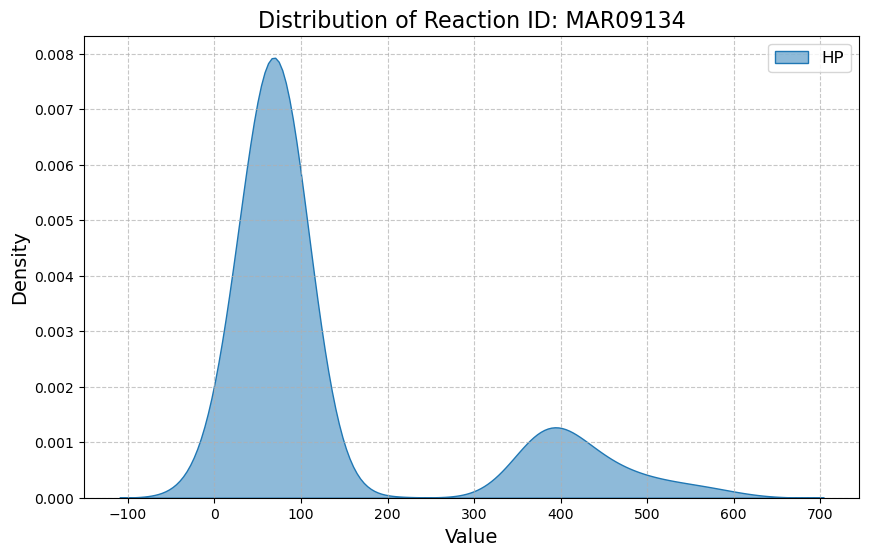

In [758]:
plot_reaction_distribution(hp_tr_24, lp_tr_24, "MAR09134")

In [717]:
def plot_reaction_distribution(df1, df2, reaction_id):
    """
    Plots the distribution of a specific reaction ID from two dataframes.

    Parameters:
        df1 (pd.DataFrame): First dataframe containing reaction data.
        df2 (pd.DataFrame): Second dataframe containing reaction data.
        reaction_id (str): The reaction ID to plot the distribution for.

    Returns:
        None
    """
    # Check if the reaction_id exists in both dataframes
    if reaction_id not in df1.columns or reaction_id not in df2.columns:
        raise ValueError(f"Reaction ID '{reaction_id}' is not present in both dataframes.")

    # Extract the data for the specified reaction_id
    data1 = df1[reaction_id]
    data2 = df2[reaction_id]

    # Create a single plot for comparison
    plt.figure(figsize=(10, 6))

    # Plot the distributions
#    sns.kdeplot(data1, label='DataFrame 1', fill=True, alpha=0.5)
    sns.kdeplot(data2, label='LP', fill=True, alpha=0.5)

    # Add labels and title
    plt.title(f'Distribution of Reaction ID: {reaction_id}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add a legend
    plt.legend(fontsize=12)

    # Set the x-axis to display numbers in standard notation and avoid scientific notation
    plt.ticklabel_format(style='plain', axis='x', useOffset=False)

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

/tmp/ipykernel_1645266/4201465646.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data1, label='HP', fill=True, alpha=0.5)


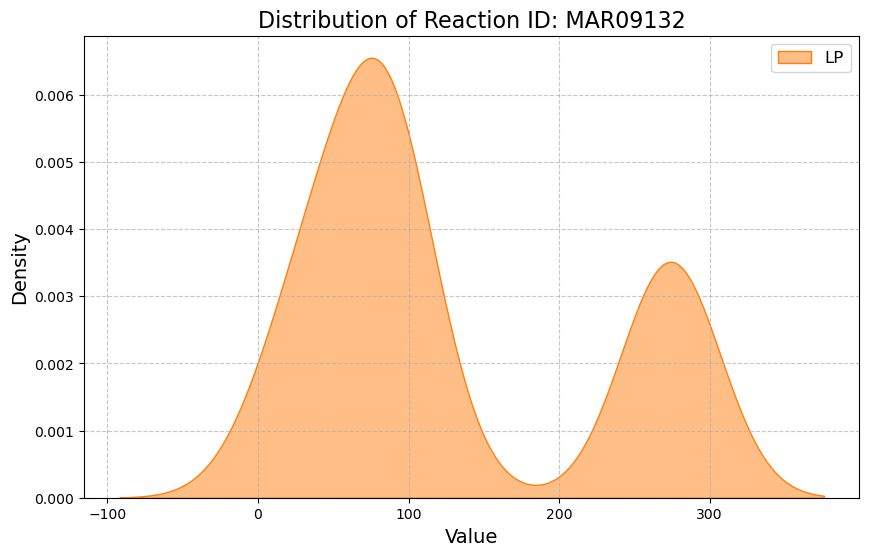

In [760]:
plot_reaction_distribution(hp_tr_24, lp_tr_24, "MAR09132")

In [719]:
def plot_reaction_distribution(df1, df2, reaction_id):
    """
    Plots the distribution of a specific reaction ID from two dataframes.

    Parameters:
        df1 (pd.DataFrame): First dataframe containing reaction data.
        df2 (pd.DataFrame): Second dataframe containing reaction data.
        reaction_id (str): The reaction ID to plot the distribution for.

    Returns:
        None
    """
    # Check if the reaction_id exists in both dataframes
    if reaction_id not in df1.columns or reaction_id not in df2.columns:
        raise ValueError(f"Reaction ID '{reaction_id}' is not present in both dataframes.")

    # Extract the data for the specified reaction_id
    data1 = df1[reaction_id]
    data2 = df2[reaction_id]

    # Create a single plot for comparison
    plt.figure(figsize=(10, 6))

    # Plot the distributions
    sns.kdeplot(data1, label='HP', fill=True, alpha=0.5)
#    sns.kdeplot(data2, label='DataFrame 2', fill=True, alpha=0.5)

    # Add labels and title
    plt.title(f'Distribution of Reaction ID: {reaction_id}', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add a legend
    plt.legend(fontsize=12)

    # Set the x-axis to display numbers in standard notation and avoid scientific notation
    plt.ticklabel_format(style='plain', axis='x', useOffset=False)

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

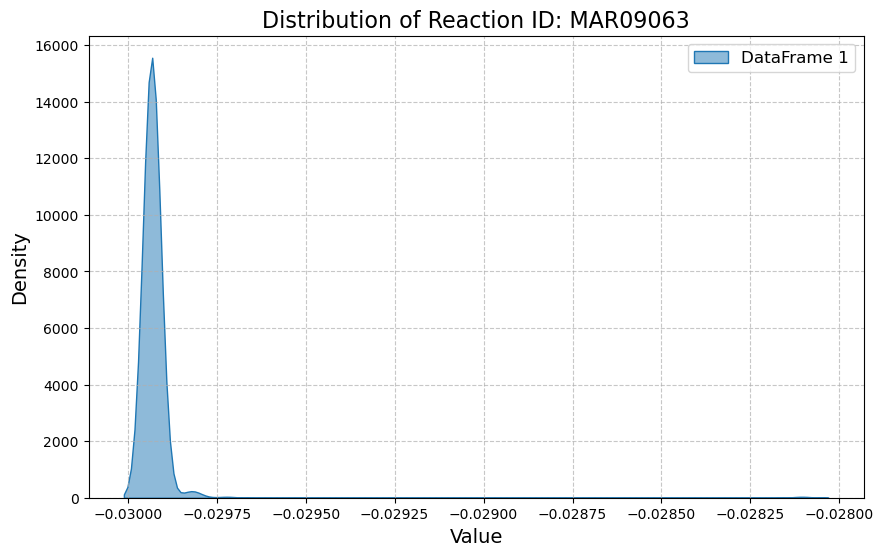

In [720]:
plot_reaction_distribution(hp_tr_4, lp_tr_4, "MAR09063")